In [50]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
import sqlalchemy as sqla
from sqlalchemy import create_engine

DB_URI = os.getenv('CD_DWH')

In [51]:
engine = create_engine(DB_URI)

QUERY = """
select
  *
from trg_analytics.candidate_contributions
"""
with engine.begin() as conn:
    results = pd.read_sql(QUERY, conn)
results.head(100)

,transaction_id,transaction_type,election_cycle,election,primary_general_indicator,transaction_date,transaction_amount,filed_date,recipient_committee_name,recipient_candidate_name,recipient_candidate_party,recipient_candidate_ico,recipient_candidate_status,recipient_candidate_office,recipient_candidate_district,donor_name,donor_city,donor_state,donor_zip_code,donor_employer,donor_occupation,donor_organization,donor_industry,donor_entity_type,donor_committee_id,donor_committee_name,donor_committee_type,donor_committee_party
0,1287430 - INC5,Monetary Contribution,2001,2007-06-08,0,2007-04-17,3600.0,2007-08-03,Jean Fuller for Assembly 2008,"FULLER, JEAN",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,32,"Hampton, Bob",Taft,CA,93268,Westside Waste Managment Co. Inc.,NOT CURRENTLY SUPPORTED,IND,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
1,1287430 - INC4,Monetary Contribution,2001,2007-06-08,0,2007-04-24,1000.0,2007-08-03,Jean Fuller for Assembly 2008,"FULLER, JEAN",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,32,Associated Builders & Contractors of Californi...,Sacramento,CA,95814,None,NOT CURRENTLY SUPPORTED,OTH,780059,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
2,1287430 - INC3,Monetary Contribution,2001,2007-06-08,0,2007-05-25,3600.0,2007-08-03,Jean Fuller for Assembly 2008,"FULLER, JEAN",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,32,Pechanga Band of Mission Indians,Temecula,CA,92593,None,NOT CURRENTLY SUPPORTED,OTH,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
3,1287430 - INC2,Monetary Contribution,2001,2007-06-08,0,2007-05-31,1000.0,2007-08-03,Jean Fuller for Assembly 2008,"FULLER, JEAN",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,32,UPSPAC California,Atlanta,GA,30328,None,NOT CURRENTLY SUPPORTED,COM,921055,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
4,1287430 - INC1,Monetary Contribution,2001,2007-06-08,0,2007-06-26,3600.0,2007-08-03,Jean Fuller for Assembly 2008,"FULLER, JEAN",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,32,Tejon Ranch,Lebec,CA,93243,None,NOT CURRENTLY SUPPORTED,OTH,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
5,674872 - T54110,Monetary Contribution,2001,2001-11-07,0,2001-01-29,500.0,2002-01-09,LONGVILLE FOR ASSEMBLY,"LONGVILLE, JOHN",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,62,Cabletron Systems,Rochester,NH,03867,None,NOT CURRENTLY SUPPORTED,OTH,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
6,674872 - T54121,Monetary Contribution,2001,2001-11-07,0,2001-02-23,1000.0,2002-01-09,LONGVILLE FOR ASSEMBLY,"LONGVILLE, JOHN",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,62,CARGO PAC,West Sacramento,CA,95691,None,NOT CURRENTLY SUPPORTED,COM,760458,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
7,674872 - T54133,Monetary Contribution,2001,2001-11-07,0,2001-03-21,1000.0,2002-01-09,LONGVILLE FOR ASSEMBLY,"LONGVILLE, JOHN",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,62,Youngs Market Co,Orange,CA,92665,None,NOT CURRENTLY SUPPORTED,OTH,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
8,674872 - T54130,Monetary Contribution,2001,2001-11-07,0,2001-03-27,1000.0,2002-01-09,LONGVILLE FOR ASSEMBLY,"LONGVILLE, JOHN",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,62,Southern Wine & Spirits,Union City,CA,94587,None,NOT CURRENTLY SUPPORTED,OTH,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
9,674872 - T54116,Monetary Contribution,2001,2001-11-07,0,2001-04-19,1000.0,2002-01-09,LONGVILLE FOR ASSEMBLY,"LONGVILLE, JOHN",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,62,CA Manufa

In [3]:
results.donor_state = results.donor_state.str.upper()

In [4]:
grouped = results.groupby(['donor_state'])['transaction_amount'].sum()
grouped = grouped.sort_values(ascending=False)
grouped = grouped[1:10]

In [5]:
cities = grouped.index
donated = grouped.values

In [6]:
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 

Current size: [6.0, 4.0]


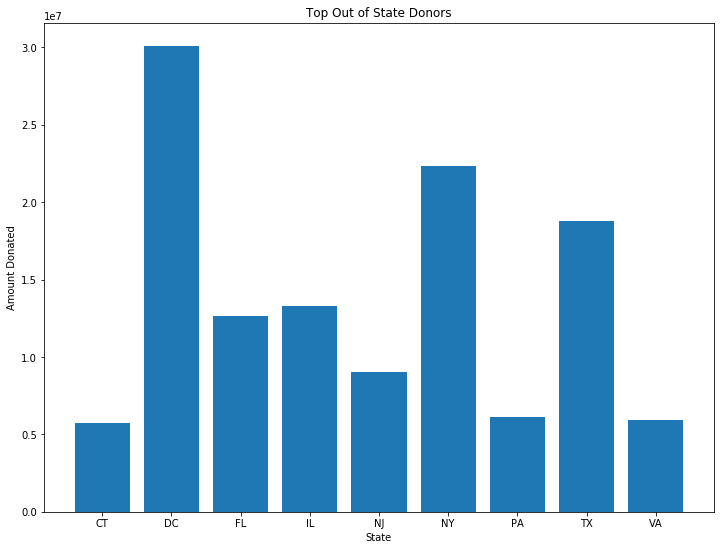

In [7]:
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.bar(cities, donated)
plt.title("Top Out of State Donors")
plt.ylabel('Amount Donated')
plt.xlabel('State')
plt.show()

In [22]:
import numpy as np
print((len(results.loc[results.election_cycle == "2017",])/len(results))*100, "% of campaign data is from 2017/2018 election cycle")


3.3053444667515164 % of campaign data is from 2017/2018 election cycle


In [27]:
count_nan = len(results) - results.count()
print("Number of NaNs \n", count_nan)

Number of NaNs 
 transaction_id                        0
transaction_type                      0
election_cycle                        0
election                         311806
primary_general_indicator             0
transaction_date                    122
transaction_amount                    0
filed_date                            0
recipient_committee_name              0
recipient_candidate_name           1371
recipient_candidate_party             0
recipient_candidate_ico         1502264
recipient_candidate_status            0
recipient_candidate_office            0
recipient_candidate_district     392708
donor_name                           13
donor_city                          611
donor_state                        2247
donor_zip_code                     2219
donor_employer                   753227
donor_occupation                      0
donor_organization                   30
donor_industry                        0
donor_entity_type                     0
donor_committee_id     

In [41]:
results.loc[results.donor_name.isnull(),]

,transaction_id,transaction_type,election_cycle,election,primary_general_indicator,transaction_date,transaction_amount,filed_date,recipient_committee_name,recipient_candidate_name,recipient_candidate_party,recipient_candidate_ico,recipient_candidate_status,recipient_candidate_office,recipient_candidate_district,donor_name,donor_city,donor_state,donor_zip_code,donor_employer,donor_occupation,donor_organization,donor_industry,donor_entity_type,donor_committee_id,donor_committee_name,donor_committee_type,donor_committee_party
255746,1607955 - C1431,Monetary Contribution,2011,None,0,2011-06-30,1000.0,2011-08-01,Steven Bradford for Assembly 2012,"BRADFORD, STEVEN",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,51.0,None,Seattle,WA,98101,Information Requested,NOT CURRENTLY SUPPORTED,IND,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
673061,1904844 - C10555512,Monetary Contribution,2013,2014-11-04,0,2014-10-10,100.0,2014-10-23,Bill Quirk for Assembly 2014,"QUIRK, BILL (WILLIAM J.)",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,Other,20,None,Galt,CA,95632,BANC,NOT CURRENTLY SUPPORTED,IND,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
673062,1904844 - C10555509,Monetary Contribution,2013,2014-11-04,0,2014-10-10,200.0,2014-10-23,Bill Quirk for Assembly 2014,"QUIRK, BILL (WILLIAM J.)",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,Other,20,None,Washington,DC,20009,Spiegel & McDermott,NOT CURRENTLY SUPPORTED,IND,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
691519,2017676 - C3921282,Monetary Contribution,2013,None,0,2014-06-14,100.0,2016-02-26,Craig Steckler for Assembly 2014,"STECKLER, CRAIG",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,Other,25,None,Fremont,CA,94539,None,NOT CURRENTLY SUPPORTED,IND,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
854659,947752 - DB2039,Monetary Contribution,2003,2004-03-02,0,2003-05-01,250.0,2003-07-31,Friends of John Benoit,"BENOIT, JOHN J.",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,64,None,"Riverside,",CA,92507,None,NOT CURRENTLY SUPPORTED,OTH,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
1130613,786162 - A145,Monetary Contribution,2001,2002-03-05,0,2001-09-05,80.0,2002-01-30,Friends of Darrell Steinberg,"STEINBERG, DARRELL",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,9,None,Sacramento,CA,95833,Fox & Goose Public House,NOT CURRENTLY SUPPORTED,IND,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
1130640,786162 - A162,Monetary Contribution,2001,2002-03-05,0,2001-09-05,75.0,2002-01-30,Friends of Darrell Steinberg,"STEINBERG, DARRELL",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,9,None,Sacramento,CA,95825,Sacramento County Unified School District,NOT CURRENTLY SUPPORTED,IND,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
1130646,786162 - A212,Monetary Contribution,2001,2002-03-05,0,2001-09-05,290.0,2002-01-30,Friends of Darrell Steinberg,"STEINBERG, DARRELL",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,9,None,Sacramento,CA,95818,California State Assembly,NOT CURRENTLY SUPPORTED,IND,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
1130651,786162 - A237,Monetary Contribution,2001,2002-03-05,0,2001-09-05,70.0,2002-01-30,Friends of Darrell Steinberg,"STEINBERG, DARRELL",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPPORTED,State Assembly,9,None,Sacramento,CA,95831,Tod M. Pritchett Attorney at Law,NOT CURRENTLY SUPPORTED,IND,0,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,NOT CURRENTLY SUPPORTED,None,None
1130685,786162 - A175,Monetary Contribution,2001,2002-03-05,0,2001-09-05,65.0,2002-01-30,Friends of Darrell Steinberg,"STEINBERG, DARRELL",NOT CURRENTLY SUPPORTED,None,NOT CURRENTLY SUPP

## Notes
There are transaction data that seem to be corrupt, 0$ donations etc
"Friends" donations

In [46]:
top_donators = results.groupby(["donor_name"])["transaction_amount"].sum()
top_donators = top_donators.sort_values(ascending=False)
top_donators

donor_name
Whitman, Margaret                                                                                   1.442410e+08
Democratic State Central Committee of California                                                    4.382785e+07
Westly, Steve                                                                                       4.087512e+07
Poizner Family Trust                                                                                3.986710e+07
California Republican Party                                                                         2.749168e+07
California Democratic Party                                                                         2.558449e+07
Simon, Jr., William E.                                                                              2.049958e+07
Democratic State Central Committee of CA                                                            1.864822e+07
Schwarzenegger, Arnold                                                               

In [48]:
top_donators.plot()

In [52]:
QUERY = """
select
  *
from data_ingest.casos__california_candidate_statewide_election_results
"""
with engine.begin() as conn:
    election_results = pd.read_sql(QUERY, conn)
election_results.head(100)

,election_name,county_name,contest_name,candidate_name,incumbent_flag,party_name,vote_total
0,2010 General,Alameda,governor,Jerry Brown,N,DEM,340190.0
1,2010 General,Alpine,governor,Jerry Brown,N,DEM,319.0
2,2010 General,Amador,governor,Jerry Brown,N,DEM,6750.0
3,2010 General,Butte,governor,Jerry Brown,N,DEM,32789.0
4,2010 General,Calaveras,governor,Jerry Brown,N,DEM,7737.0
5,2010 General,Colusa,governor,Jerry Brown,N,DEM,1878.0
6,2010 General,Contra Costa,governor,Jerry Brown,N,DEM,211125.0
7,2010 General,Del Norte,governor,Jerry Brown,N,DEM,4093.0
8,2010 General,El Dorado,governor,Jerry Brown,N,DEM,29826.0
9,2010 General,Fresno,governor,Jerry Brown,N,DEM,85743.0
